<a href="https://colab.research.google.com/github/eaamako/Audio-Classification-using-Matched-Filtering/blob/main/Audio_Classification_using_Matched_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8000.0


<Figure size 432x288 with 0 Axes>

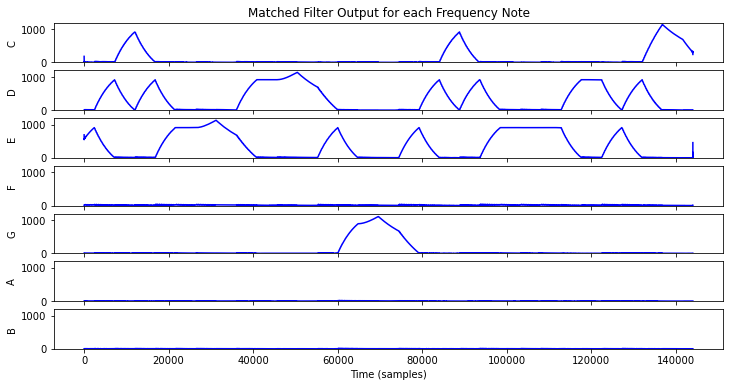

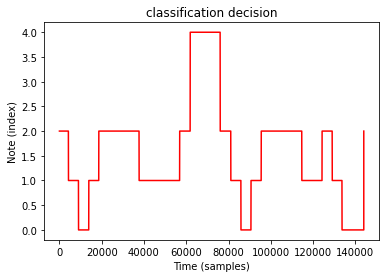

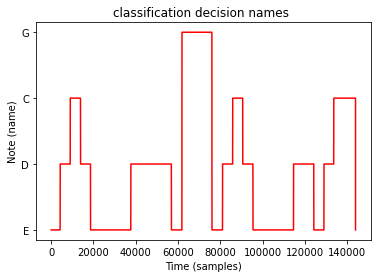

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import scipy.signal as sig


# Step 1: Read the audio file
Fs, data = wavfile.read('song.wav')

def rect(t):
    # rectangular pulse function
    x = np.zeros(len(t))
    x[abs(t) < 0.5] = 1
    return x

def main():
    bpm = 100
    note_names = ['C', 'D', 'E', 'F', 'G', 'A', 'B']
    note_freqs = np.array([
            261.6256, 
            293.6648, 
            329.6276, 
            349.2282, 
            391.9954, 
            440, 
            493.8833, 
            ])

    beats_per_sec = bpm/60
    T = 1/beats_per_sec

    # 8 kHz sample rate (phone quality audio)
    # Step 1: Read the audio file
    Fs, data = wavfile.read('song.wav')
    Fs = 8e3
    Ts = 1/Fs
    print(Fs)

    # set up timebase to be about 1.2 beats wide for visualization
    t = np.arange(-0.6*T, 0.6*T, Ts)

    # create figure window that is 10 inches wide, 5 inches tall
    
    fig, axs = plt.subplots(7, 1, figsize=(12, 6), sharex=True)

    # initialize empty arrays to hold the matched filter outputs for each note
    outputs = np.zeros((len(note_freqs), len(data)))

    # initialize empty array to hold the classification decision at each timestep
    classification = np.zeros(len(data), dtype=int)

    # compute the matched filter output for each note and plot it
    for i in range(len(note_freqs)):
        x_i = rect(t/T)*np.cos(2*np.pi*note_freqs[i]*t)
        b = np.convolve(data, x_i, mode='same')
        output = abs(sig.hilbert(b))
        outputs[i, :] = output  # store the output for later use
        axs[0].set_title('Matched Filter Output for each Frequency Note')
        axs[i].plot(output, color = 'b')
        axs[i].set_ylabel(note_names[i])
        axs[i].set_ylim(0, 1200)
        plt.xlabel('Time (samples)')

    # find the note with the maximum output at each timestep and convert it to a note name
    for i in range(len(data)):
        max_note_index = np.argmax(outputs[:, i])
        classification[i] = max_note_index

    classification_names = np.array(['C', 'D', 'E', 'F', 'G', 'A', 'B'])[classification]

    # plot the classification decision as a function of time
    plt.figure()
    plt.plot(classification, color = 'r')
    plt.title('classification decision')
    plt.xlabel('Time (samples)')
    plt.ylabel('Note (index)')

    plt.figure()
    plt.plot(classification_names, color = 'r')
    plt.title('classification decision names ')
    plt.xlabel('Time (samples)')
    plt.ylabel('Note (name)')

    plt.show()
    
    
    
plt.savefig('image.png', dpi=300)

if __name__ == '__main__':
    main()
